# Loading Data

In [70]:
import numpy as np
import pandas as pd
from pathlib import Path

# Load the dataset
csv_path = Path('fb_ads_data.csv')


# Import the facebook ads data file as a DataFrame
fb_df = pd.read_csv(csv_path, encoding="utf-8")
fb_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Calculating additional metrics - CPM, CPC, CTR, CPA

In [71]:
# Calculate metrics
fb_df['CPM'] = (fb_df['Spent'] / fb_df['Impressions']) * 1000
fb_df['CTR'] = (fb_df['Clicks'] / fb_df['Impressions']) * 100
fb_df['CPC'] = fb_df['Spent'] / fb_df['Clicks']
fb_df['CPA'] = fb_df['Spent'] / fb_df['Approved_Conversion']
fb_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.194558,0.013605,1.43,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.101898,0.011198,0.91,inf
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.293496,0.023480,1.25,inf
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.312122,0.024195,1.29,1.29


Replacing NaN values with 0

In [72]:
fb_df['CPC'] = fb_df['CPC'].replace([np.inf, -np.inf, np.nan], 0)  # Replace inf and nan values with 0
fb_df['CPA'] = fb_df['CPA'].replace([np.inf, -np.inf, np.nan], 0)  # Replace inf and nan values with 0

fb_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.194558,0.013605,1.43,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.101898,0.011198,0.91,0.00
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000,0.00,0.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.293496,0.023480,1.25,0.00
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.312122,0.024195,1.29,1.29


In [73]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CPM                  1143 non-null   float64
 12  CTR                  1143 non-null   float64
 13  CPC                  1143 non-null   float64
 14  CPA                  1143 non-null   float64
dtypes: float64(5), int64(8), object(2)
mem

# Exploratory Data Analysis

In [74]:
fb_df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.239387,0.016420,1.227812,20.719900
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.160908,0.011506,0.614889,43.761027
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.148742,0.010022,1.234500,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.248816,0.015981,1.450000,0.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.332700,0.023364,1.600000,24.075000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,1.504237,0.105932,2.212000,352.449999


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation matrix

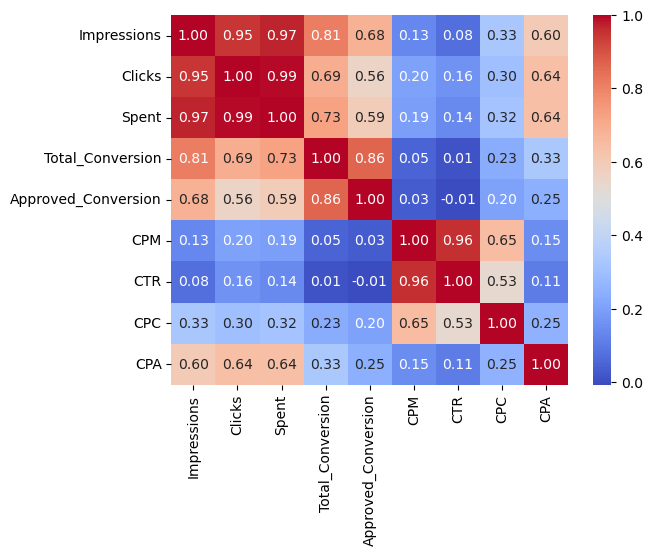

In [76]:
g=sns.heatmap(fb_df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion", "CPM","CTR","CPC","CPA"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Here it's clear, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent"

replacing the campaign identifiers with names

In [77]:
fb_df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)
fb_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,0.194558,0.013605,1.43,1.43
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.101898,0.011198,0.91,0.00
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000,0.00,0.00
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.293496,0.023480,1.25,0.00
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,0.312122,0.024195,1.29,1.29


and see how many unique campaigns we have 

In [78]:
fb_df["xyz_campaign_id"].unique()


array(['campaign_a', 'campaign_b', 'campaign_c'], dtype=object)

In [79]:
fb_df["fb_campaign_id"].value_counts()

144536    6
144562    6
144599    6
144636    6
144611    6
         ..
115866    1
115870    1
115876    1
115878    1
179982    1
Name: fb_campaign_id, Length: 691, dtype: int64

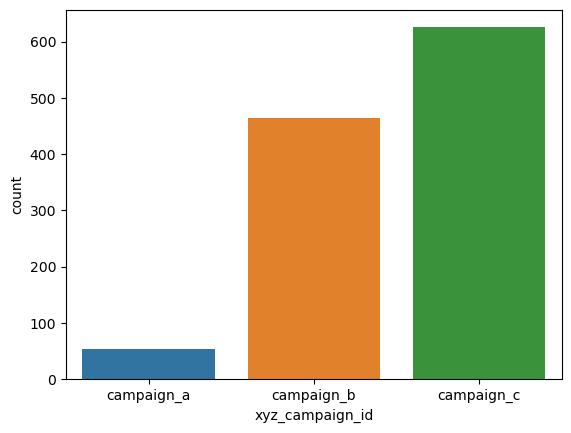

In [80]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = fb_df) 
# Show the plot 
plt.show() 

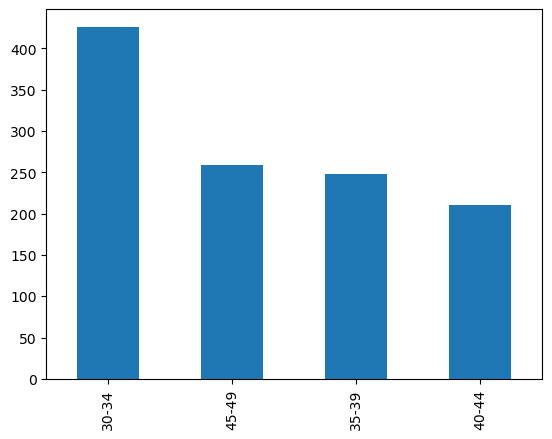

In [81]:
fb_df['age'].value_counts().plot(kind='bar');

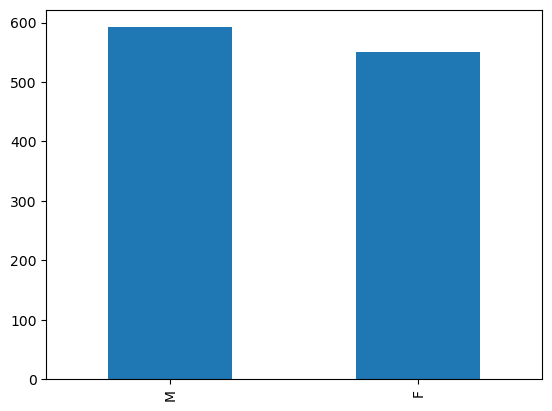

In [82]:
fb_df['gender'].value_counts().plot(kind='bar');

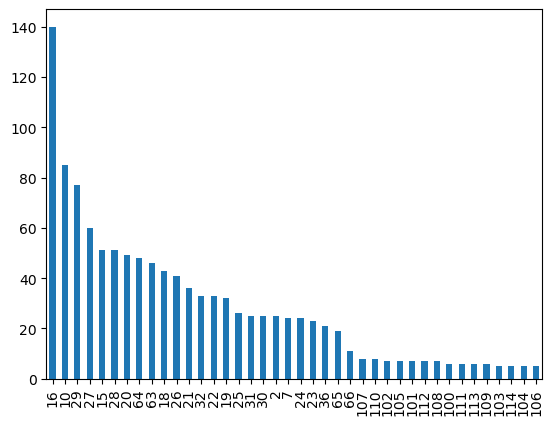

In [83]:
fb_df['interest'].value_counts().plot(kind='bar');

In [84]:
def filter_interest(df, column_name, threshold=0.8, new_column_name='filtered_interest'):
    value_counts = df[column_name].value_counts()
    total_count = value_counts.sum()
    cum_count = 0
    keep_values = []

    for value, count in value_counts.items():
        cum_count += count
        if cum_count / total_count <= threshold:
            keep_values.append(value)
        else:
            break

    fb_filtered_df = fb_df.copy()
    fb_filtered_df[new_column_name] = fb_filtered_df[column_name].apply(lambda x: x if x in keep_values else 'other')
    return fb_filtered_df

In [85]:
fb_df = filter_interest(fb_df, 'interest', threshold=0.8, new_column_name='pareto_interest')


In [86]:
fb_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA,pareto_interest
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,0.194558,0.013605,1.43,1.43,15
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.101898,0.011198,0.91,0.00,16
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000,0.00,0.00,20
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.293496,0.023480,1.25,0.00,28
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,0.312122,0.024195,1.29,1.29,28


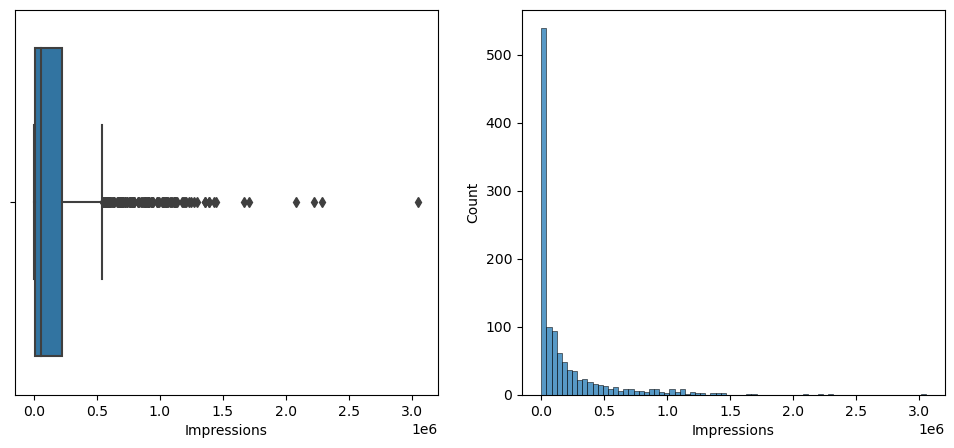

In [87]:
fig, Axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(data=fb_df, x='Impressions', ax=Axes[0])
sns.histplot(data=fb_df, x='Impressions', ax=Axes[1])
plt.show();

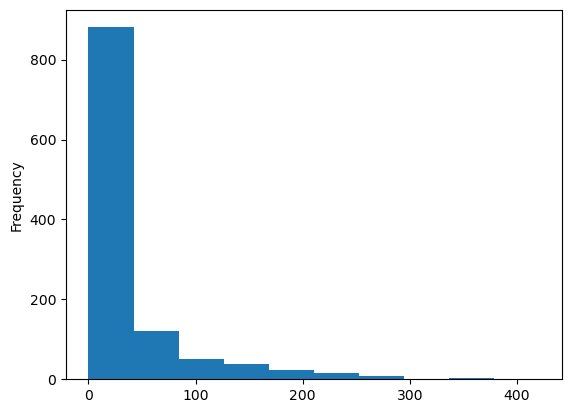

In [88]:
fb_df['Clicks'].plot(kind='hist');

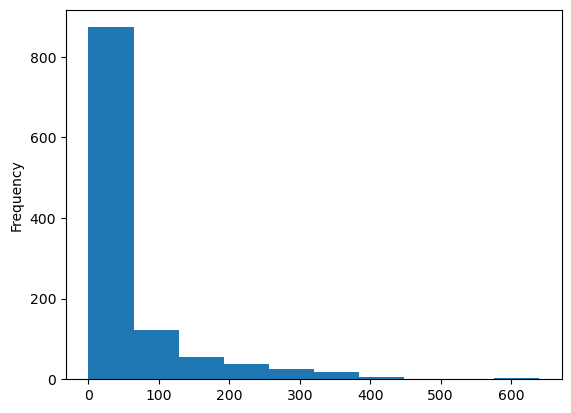

In [89]:
fb_df['Spent'].plot(kind='hist');

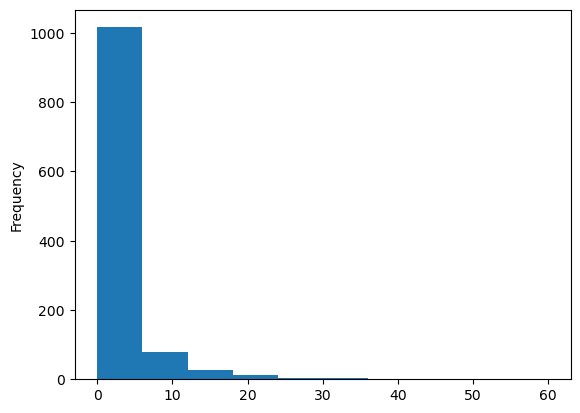

In [90]:
fb_df['Total_Conversion'].plot(kind='hist');

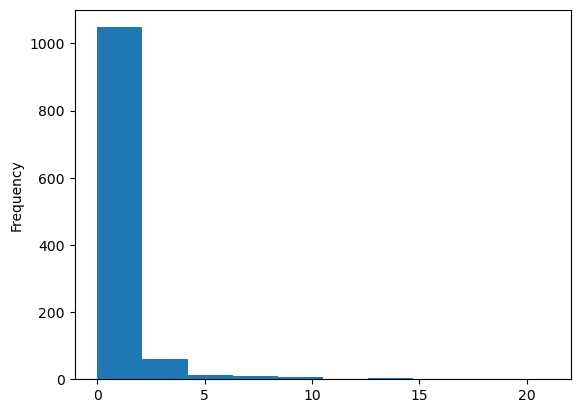

In [91]:
fb_df['Approved_Conversion'].plot(kind='hist');

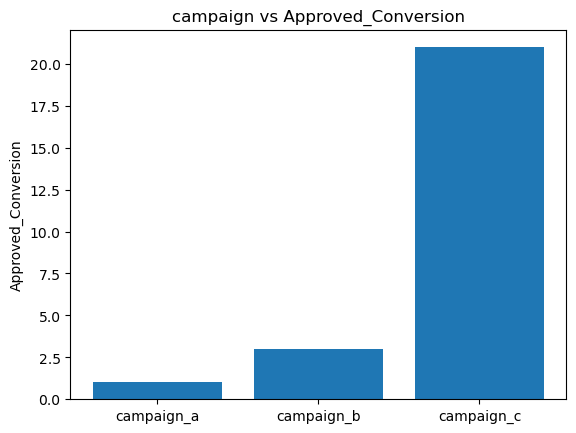

In [92]:
#Approved_Conversion
# Creating our bar plot
plt.bar(fb_df["xyz_campaign_id"], fb_df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("campaign vs Approved_Conversion")
plt.show()

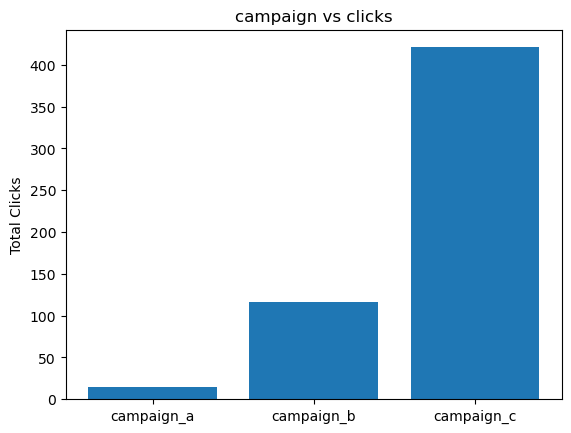

In [93]:
#Total Clicks
# Creating our bar plot
plt.bar(fb_df["xyz_campaign_id"], fb_df["Clicks"])
plt.ylabel("Total Clicks")
plt.title("campaign vs clicks")
plt.show()

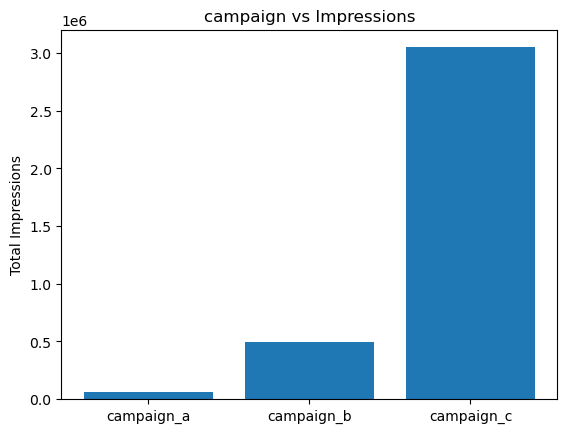

In [94]:
#Total Clicks
# Creating our bar plot
plt.bar(fb_df["xyz_campaign_id"], fb_df["Impressions"])
plt.ylabel("Total Impressions")
plt.title("campaign vs Impressions")
plt.show()

We'll identify if the ad converted or not

In [95]:
fb_df['conv1'] = np.where(fb_df['Total_Conversion'] != 0, 1, 0)
fb_df['conv2'] = np.where(fb_df['Approved_Conversion'] != 0, 1, 0)

In [96]:
fb_df['conv1'].value_counts()

1    1135
0       8
Name: conv1, dtype: int64

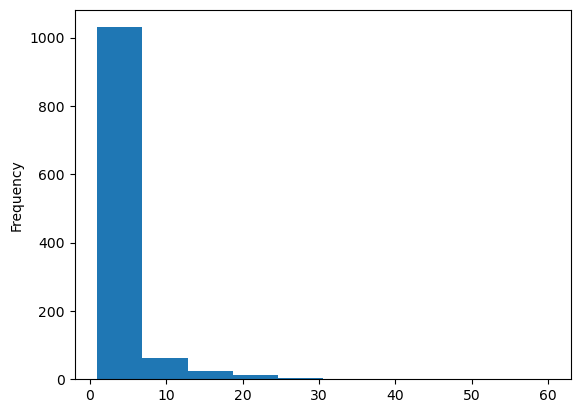

In [97]:
fb_df.loc[fb_df['conv1'] == 1]['Total_Conversion'].plot(kind='hist');

In [98]:
fb_df['conv2'].value_counts()

1    584
0    559
Name: conv2, dtype: int64

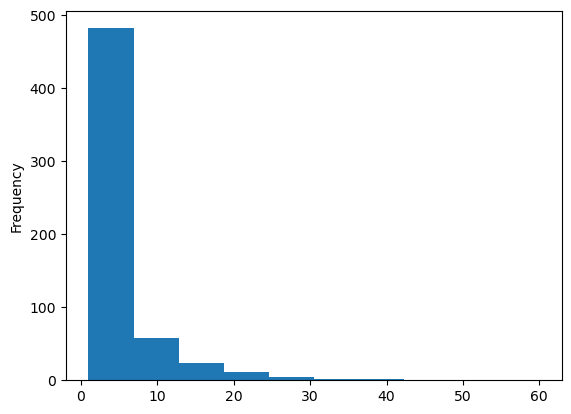

In [99]:
fb_df.loc[fb_df['conv2'] == 1]['Total_Conversion'].plot(kind='hist');

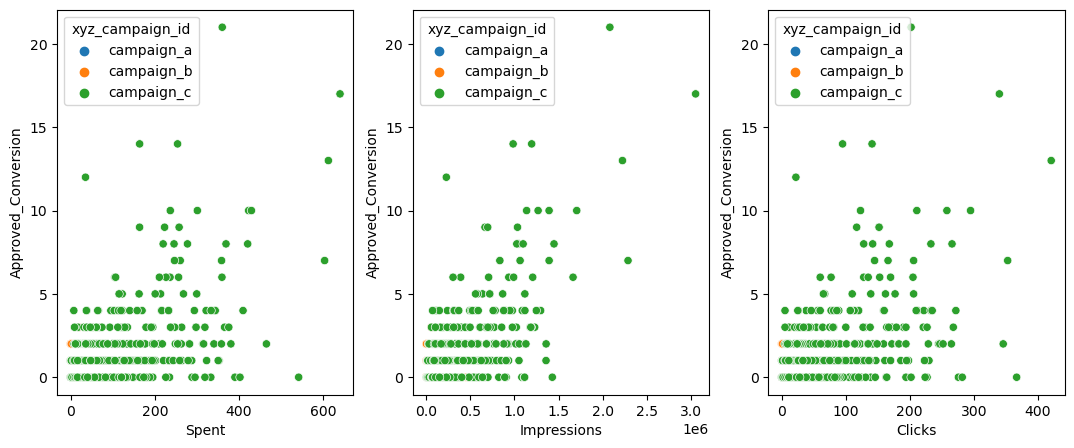

In [100]:
Fig, Axes = plt.subplots(1,3, figsize=(13,5))
sns.scatterplot(data=fb_df, x='Spent', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[0])
sns.scatterplot(data=fb_df, x='Impressions', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[1])
sns.scatterplot(data=fb_df, x='Clicks', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[2]);

Lets take a look at wich variables makes a difference if an Ad leads to conversion or not. 

In [101]:
fb_df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CPM', 'CTR', 'CPC', 'CPA', 'pareto_interest',
       'conv1', 'conv2'],
      dtype='object')

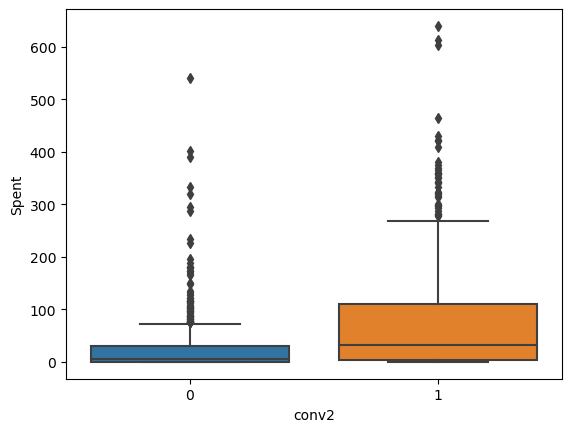

In [102]:
sns.boxplot(data=fb_df, y='Spent', x='conv2');

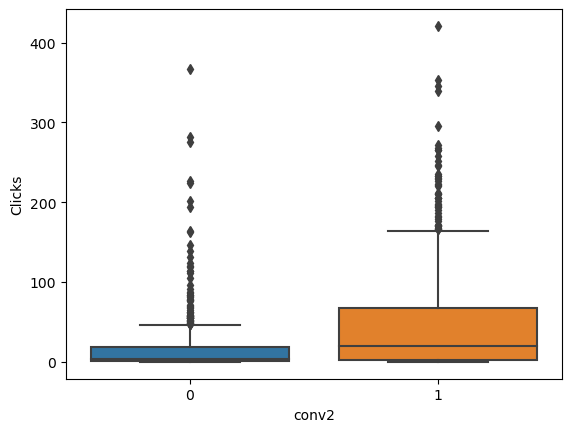

In [103]:
sns.boxplot(data=fb_df, y='Clicks', x='conv2');

## Correlation Analysis

In [104]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   object 
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CPM                  1143 non-null   float64
 12  CTR                  1143 non-null   float64
 13  CPC                  1143 non-null   float64
 14  CPA                  1143 non-null   float64
 15  pareto_interest      1143 non-null   o

In [105]:
age_dummies = pd.get_dummies(fb_df['age'])
gender_dummies = pd.get_dummies(fb_df['gender'])
campaign_dummies = pd.get_dummies(fb_df['xyz_campaign_id'])
pareto_interest_dummies = pd.get_dummies(fb_df['pareto_interest'], prefix='int')

In [106]:
fb_df2 = pd.concat([fb_df, age_dummies, gender_dummies, campaign_dummies, pareto_interest_dummies], axis=1).drop(['age', 'gender', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'pareto_interest'], axis=1).set_index('ad_id')

In [107]:
fb_df2.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA,conv1,...,int_26,int_27,int_28,int_29,int_30,int_31,int_32,int_63,int_64,int_other
ad_id,,,,,,,,,,,,,,,,,,,,,
708746,7350,1,1.43,2,1,0.194558,0.013605,1.43,1.43,1,...,0,0,0,0,0,0,0,0,0,0
708749,17861,2,1.82,2,0,0.101898,0.011198,0.91,0.00,1,...,0,0,0,0,0,0,0,0,0,0
708771,693,0,0.00,1,0,0.000000,0.000000,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
708815,4259,1,1.25,1,0,0.293496,0.023480,1.25,0.00,1,...,0,0,1,0,0,0,0,0,0,0
708818,4133,1,1.29,1,1,0.312122,0.024195,1.29,1.29,1,...,0,0,1,0,0,0,0,0,0,0


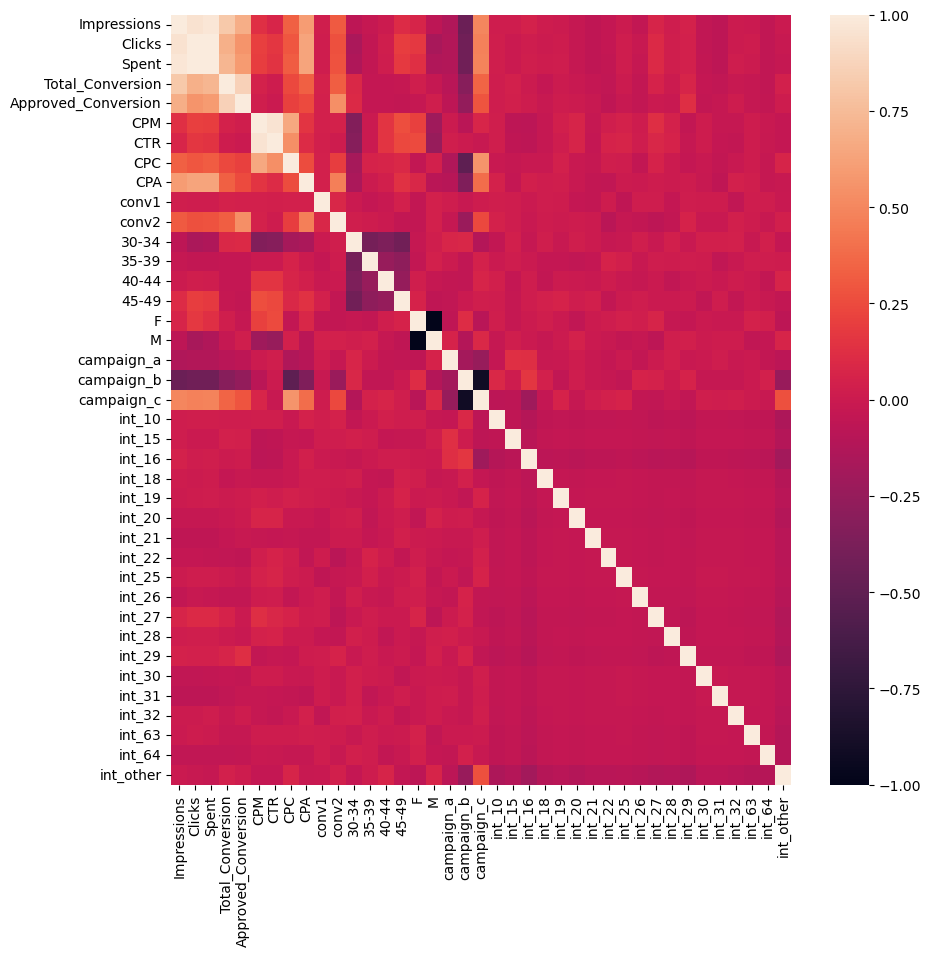

In [108]:
corr = fb_df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

## Regresion Analysis

In [109]:
fb_df2.columns

Index(['Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CPM', 'CTR', 'CPC', 'CPA', 'conv1', 'conv2',
       '30-34', '35-39', '40-44', '45-49', 'F', 'M', 'campaign_a',
       'campaign_b', 'campaign_c', 'int_10', 'int_15', 'int_16', 'int_18',
       'int_19', 'int_20', 'int_21', 'int_22', 'int_25', 'int_26', 'int_27',
       'int_28', 'int_29', 'int_30', 'int_31', 'int_32', 'int_63', 'int_64',
       'int_other'],
      dtype='object')

In [110]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.linear_model import LinearRegression

In [111]:
# Create a scatter plot with the sales information
sales_plot = fb_df2.hvplot.scatter(
    x="Impressions",
    y="Total_Conversion",
    title="Sales per Number of Ads"
)
sales_plot

:Scatter   [Impressions]   (Total_Conversion)

In [112]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = fb_df2["Impressions"].values.reshape(-1, 1)

# Display sample data
X[:5]

# Create an array for the dependent variable y with the sales data
y = fb_df2["Total_Conversion"]

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Display the slope
print(f"Model's slope: {model.coef_}")

# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

# Make predictions using the X set
predicted_y_values = model.predict(X)

Model's y-intercept: 0.6797635633922208
Model's slope: [1.16524106e-05]
Model's formula: y = 0.6797635633922208 + 1.1652410575853587e-05X


In [113]:
# Create a copy of the original data
fb_conv_predicted = fb_df2.copy()

# Add a column with the predicted sales values
fb_conv_predicted["conv_predicted"] = predicted_y_values

# Display sample data
fb_conv_predicted.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA,conv1,...,int_27,int_28,int_29,int_30,int_31,int_32,int_63,int_64,int_other,conv_predicted
ad_id,,,,,,,,,,,,,,,,,,,,,
708746,7350,1,1.43,2,1,0.194558,0.013605,1.43,1.43,1,...,0,0,0,0,0,0,0,0,0,0.765409
708749,17861,2,1.82,2,0,0.101898,0.011198,0.91,0.00,1,...,0,0,0,0,0,0,0,0,0,0.887887
708771,693,0,0.00,1,0,0.000000,0.000000,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0.687839
708815,4259,1,1.25,1,0,0.293496,0.023480,1.25,0.00,1,...,0,1,0,0,0,0,0,0,0,0.729391
708818,4133,1,1.29,1,1,0.312122,0.024195,1.29,1.29,1,...,0,1,0,0,0,0,0,0,0,0.727923


In [114]:
# Create a line plot of the predicted salary values
best_fit_line = fb_conv_predicted.hvplot.line(
    x="Impressions",
    y="conv_predicted",
    color = "red"
)
best_fit_line

# Superpose the original data and the best fit line
sales_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [Impressions]   (Total_Conversion)
   .Curve.I   :Curve   [Impressions]   (conv_predicted)

                            OLS Regression Results                            
Dep. Variable:            Impressions   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     871.7
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:32:15   Log-Likelihood:                -14275.
No. Observations:                1143   AIC:                         2.861e+04
Df Residuals:                    1113   BIC:                         2.876e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.059e+04   2683.705     -3.944      0.0

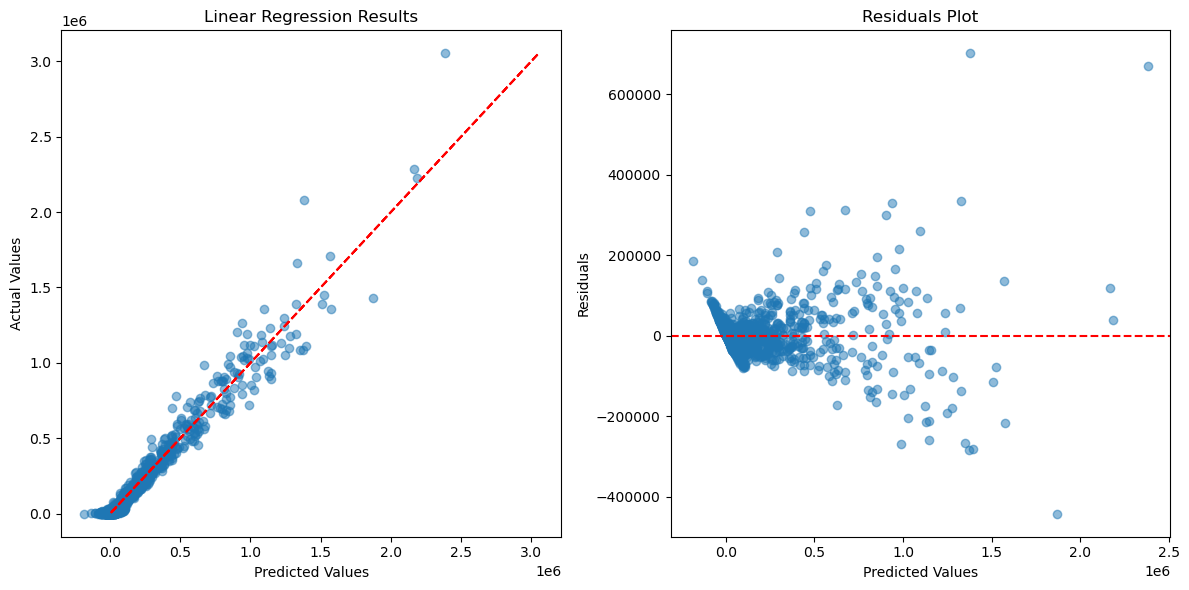

In [115]:
# Prepare the data
X = fb_df2.drop(['Impressions','Clicks', 'Total_Conversion', 'Approved_Conversion','conv1','conv2' ], axis=1)
Y = fb_df2[['Impressions']]

# Add constant column to X
X = sm.add_constant(X)

# Train the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Plot the predicted values vs. actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values
ax[0].scatter(results.predict(), Y, alpha=0.5)
ax[0].plot(Y, Y, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title('Linear Regression Results')

# Plot residuals
residuals = results.resid
ax[1].scatter(results.predict(), residuals, alpha=0.5)
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Total_Conversion   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     114.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          8.79e-320
Time:                        19:32:16   Log-Likelihood:                -2517.4
No. Observations:                1143   AIC:                             5099.
Df Residuals:                    1111   BIC:                             5260.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2939      0.093      3.177      

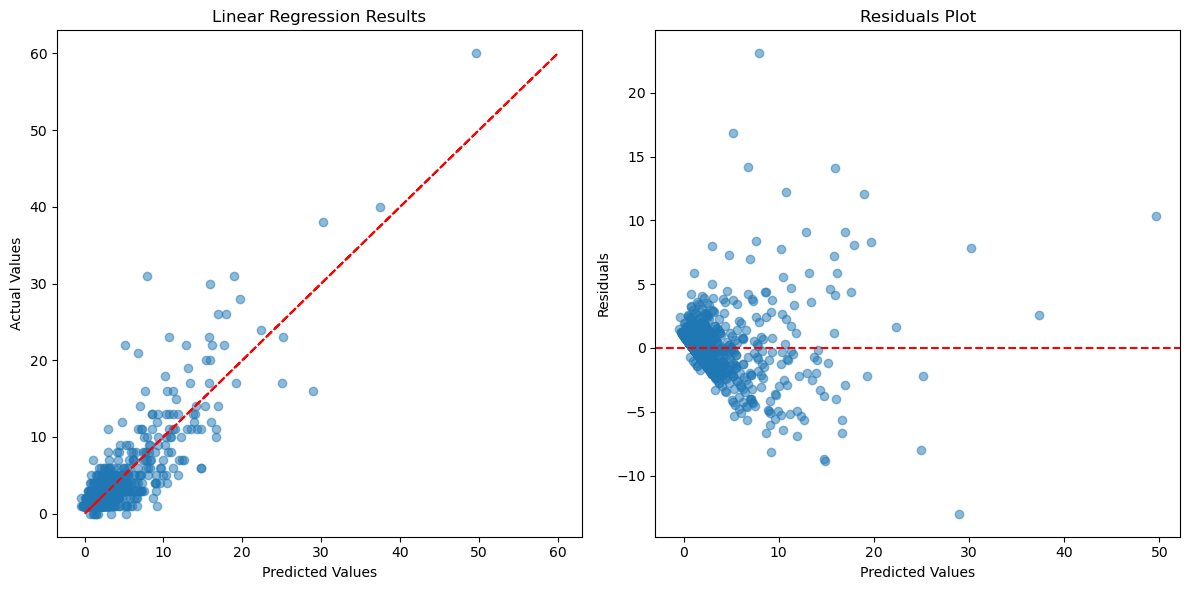

In [116]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = fb_df2[['Total_Conversion']]

# Add constant column to X
X = sm.add_constant(X)

# Train the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Plot the predicted values vs. actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values
ax[0].scatter(results.predict(), Y, alpha=0.5)
ax[0].plot(Y, Y, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title('Linear Regression Results')

# Plot residuals
residuals = results.resid
ax[1].scatter(results.predict(), residuals, alpha=0.5)
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

In [117]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


                             OLS Regression Results                            
Dep. Variable:     Approved_Conversion   R-squared:                       0.590
Model:                             OLS   Adj. R-squared:                  0.578
Method:                  Least Squares   F-statistic:                     51.49
Date:                 Mon, 28 Aug 2023   Prob (F-statistic):          1.44e-190
Time:                         19:32:16   Log-Likelihood:                -1743.9
No. Observations:                 1143   AIC:                             3552.
Df Residuals:                     1111   BIC:                             3713.
Df Model:                           31                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0980      0.047      2

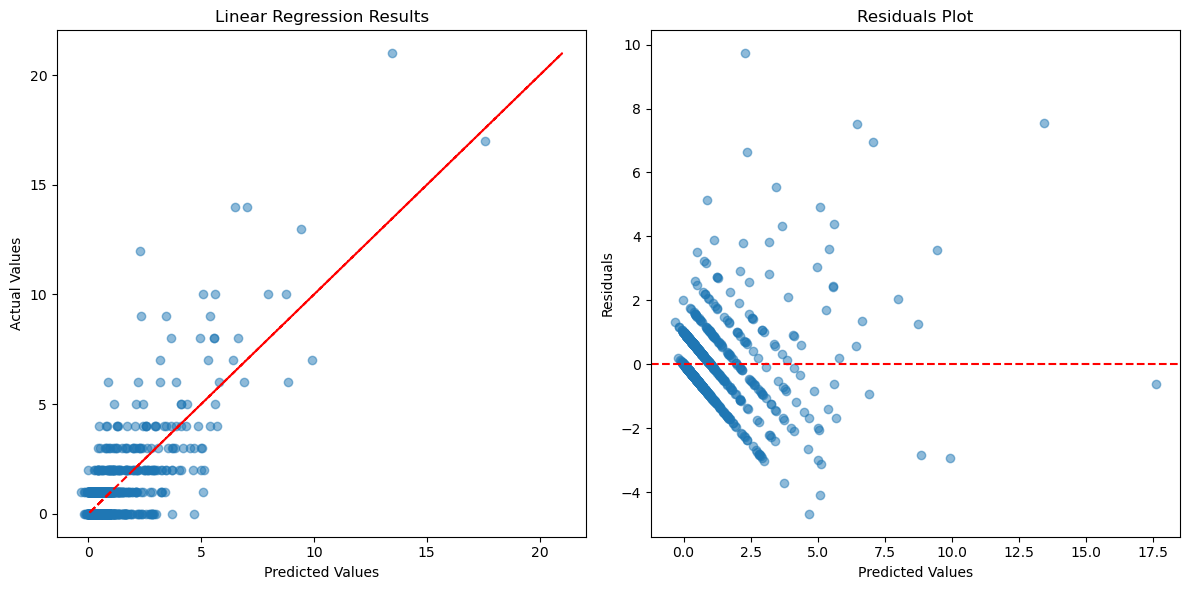

In [118]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = fb_df2[['Approved_Conversion']]

# Add constant column to X
X = sm.add_constant(X)

# Train the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Plot the predicted values vs. actual values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values
ax[0].scatter(results.predict(), Y, alpha=0.5)
ax[0].plot(Y, Y, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title('Linear Regression Results')

# Plot residuals
residuals = results.resid
ax[1].scatter(results.predict(), residuals, alpha=0.5)
ax[1].axhline(y=0, color='red', linestyle='--')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

## Conversion Prediction

/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


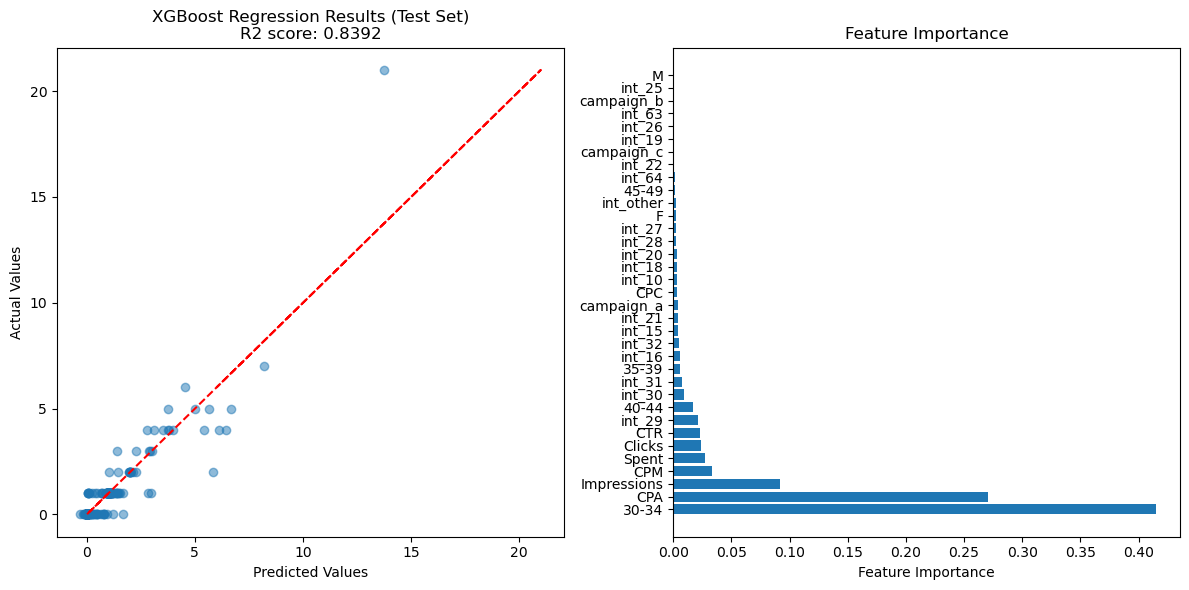

In [119]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = fb_df2[['Approved_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)

# Calculate R2 score for the training set
Y_train_pred = model.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)

# Calculate R2 score for the test set
Y_test_pred = model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Plot the predicted values vs. actual values and feature importance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values for the test set
ax[0].scatter(Y_test_pred, Y_test, alpha=0.5)
ax[0].plot(Y_test, Y_test, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')

# Plot feature importance
feature_importance = model.feature_importances_
sorted_indices = feature_importance.argsort()[::-1]  # Sort feature indices in descending order
sorted_features = X.columns[sorted_indices]  # Sort feature names based on indices

ax[1].barh(range(len(feature_importance)), feature_importance[sorted_indices])
ax[1].set_yticks(range(len(feature_importance)))
ax[1].set_yticklabels(sorted_features)
ax[1].set_xlabel('Feature Importance')
ax[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

In [120]:
X.columns

Index(['Impressions', 'Clicks', 'Spent', 'CPM', 'CTR', 'CPC', 'CPA', '30-34',
       '35-39', '40-44', '45-49', 'F', 'M', 'campaign_a', 'campaign_b',
       'campaign_c', 'int_10', 'int_15', 'int_16', 'int_18', 'int_19',
       'int_20', 'int_21', 'int_22', 'int_25', 'int_26', 'int_27', 'int_28',
       'int_29', 'int_30', 'int_31', 'int_32', 'int_63', 'int_64',
       'int_other'],
      dtype='object')

/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


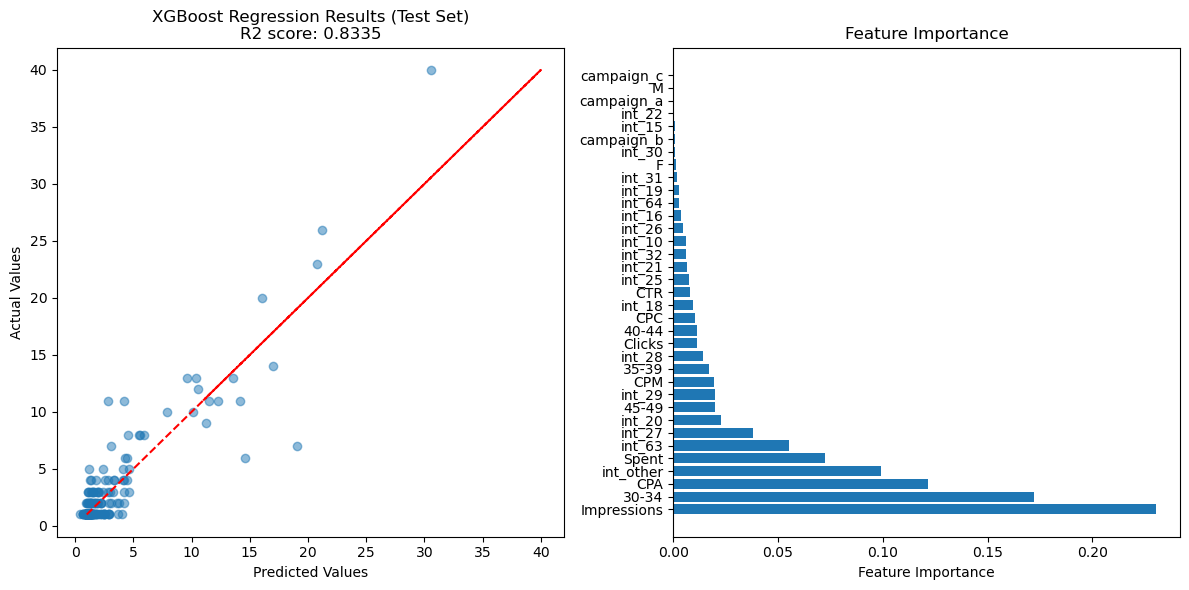

In [121]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = fb_df2[['Total_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)

# Calculate R2 score for the training set
Y_train_pred = model.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)

# Calculate R2 score for the test set
Y_test_pred = model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Plot the predicted values vs. actual values and feature importance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot predicted vs. actual values for the test set
ax[0].scatter(Y_test_pred, Y_test, alpha=0.5)
ax[0].plot(Y_test, Y_test, color='red', linestyle='--')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')

# Plot feature importance
feature_importance = model.feature_importances_
sorted_indices = feature_importance.argsort()[::-1]  # Sort feature indices in descending order
sorted_features = X.columns[sorted_indices]  # Sort feature names based on indices

ax[1].barh(range(len(feature_importance)), feature_importance[sorted_indices])
ax[1].set_yticks(range(len(feature_importance)))
ax[1].set_yticklabels(sorted_features)
ax[1].set_xlabel('Feature Importance')
ax[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

### Hyperparameters Optimization

In [122]:
from sklearn.model_selection import GridSearchCV

/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-pack

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
R2 Score (Test Set): 0.8805971106854342


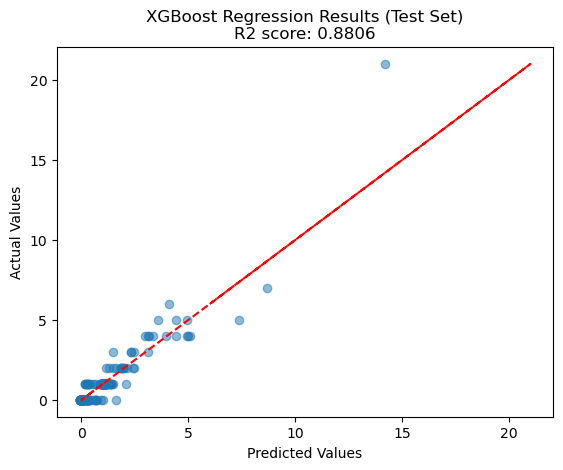

In [123]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = fb_df2[['Approved_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.1, 0.01, 0.001]
}

# Create the XGBoost regression model
model = xgb.XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3)
grid_search.fit(X_train, Y_train)

# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

# Calculate R2 score for the test set using the best model
Y_test_pred = best_model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Print the best hyperparameters and the corresponding R2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("R2 Score (Test Set):", r2_test)

# Plot the predicted values vs. actual values for the test set using the best model
fig, ax = plt.subplots()
ax.scatter(Y_test_pred, Y_test, alpha=0.5)
ax.plot(Y_test, Y_test, color='red', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')
plt.show()

/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/liammccarthy/opt/anaconda3/envs/dev/lib/python3.10/site-pack

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400}
R2 Score (Test Set): 0.8578261807051828


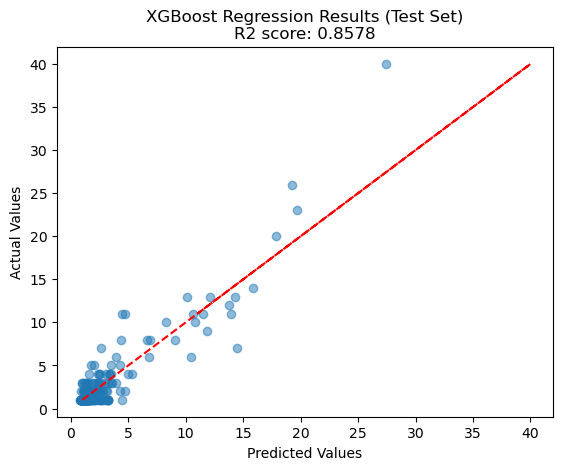

In [124]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1)
Y = fb_df2[['Total_Conversion']]

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [1, 2, 3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the XGBoost regression model
model = xgb.XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3)
grid_search.fit(X_train, Y_train)

# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_

# Calculate R2 score for the test set using the best model
Y_test_pred = best_model.predict(X_test)
r2_test = r2_score(Y_test, Y_test_pred)

# Print the best hyperparameters and the corresponding R2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("R2 Score (Test Set):", r2_test)

# Plot the predicted values vs. actual values for the test set using the best model
fig, ax = plt.subplots()
ax.scatter(Y_test_pred, Y_test, alpha=0.5)
ax.plot(Y_test, Y_test, color='red', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(f'XGBoost Regression Results (Test Set)\nR2 score: {r2_test:.4f}')
plt.show()

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


Best R2 Score: 0.8327 at Epoch: 586
Final R2 Score (Test Set): 0.8203


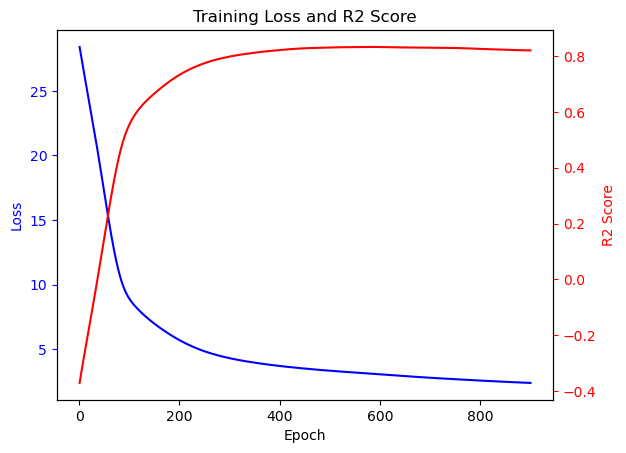

In [126]:
# Prepare the data
X = fb_df2.drop(['Total_Conversion', 'Approved_Conversion', 'conv1', 'conv2'], axis=1).values
Y = fb_df2[['Total_Conversion']].values

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Define the Fully Connected Neural Network (FCNN) model
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the hyperparameters
input_size = X_train.shape[1]
hidden_size = 73
output_size = 1
learning_rate = 0.001
num_epochs = 900

# Create the FCNN model
model = FCNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
loss_values = []
r2_values = []
best_r2_score = -float('inf')
best_epoch = 0

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save the loss value
    loss_values.append(loss.item())

    # Evaluation
    model.eval()
    with torch.no_grad():
        Y_pred_tensor = model(X_test_tensor)
        r2_test = r2_score(Y_test, Y_pred_tensor.numpy())

    # Save the R2 value
    r2_values.append(r2_test)

    # Check if current R2 score is the best so far
    if r2_test > best_r2_score:
        best_r2_score = r2_test
        best_epoch = epoch + 1

# Print the best R2 score and the corresponding epoch
print(f'Best R2 Score: {best_r2_score:.4f} at Epoch: {best_epoch}')

# Print the R2 score on the test set
print(f'Final R2 Score (Test Set): {r2_values[-1]:.4f}')

# Plot the loss values and R2 values
fig, ax1 = plt.subplots()

ax1.plot(range(1, num_epochs + 1), loss_values, 'b-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, num_epochs + 1), r2_values, 'r-')
ax2.set_ylabel('R2 Score', color='r')
ax2.tick_params('y', colors='r')

plt.title('Training Loss and R2 Score')
plt.show()

In [127]:
grouped_totals = fb_df.groupby('xyz_campaign_id')
grouped_totals.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA,pareto_interest,conv1,conv2
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.430000,2,1,0.194558,0.013605,1.430000,1.430000,15,1,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.820000,2,0,0.101898,0.011198,0.910000,0.000000,16,1,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,0.000000,0.000000,0.000000,20,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.250000,1,0,0.293496,0.023480,1.250000,0.000000,28,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.290000,1,1,0.312122,0.024195,1.290000,1.290000,28,1,1
54,734209,campaign_b,108654,30-34,M,10,1772,0,0.000000,1,1,0.000000,0.000000,0.000000,0.000000,10,1,1
55,734210,campaign_b,108654,30-34,M,10,13329,4,5.630000,1,1,0.422387,0.030010,1.407500,5.630000,10,1,1
56,734215,campaign_b,108655,30-34,M,15,13659,3,3.840000,1,0,0.281133,0.021964,1.280000,0.000000,15,1,0
57,734243,campaign_b,108660,30-34,M,21,739,0,0.000000,1,1,0.000000,0.000000,0.000000,0.000000,21,1,1
58,734266,campaign_b,108664,30-34,M,25,605,0,0.000000,1,0,0.000000,0.000000,0.000000,0.000000,25,1,0


<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

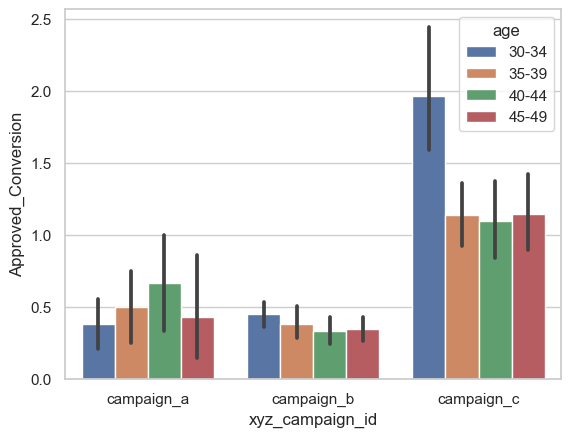

In [128]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=fb_df["xyz_campaign_id"], y=fb_df["Approved_Conversion"], hue=fb_df["age"], data=tips)

<Axes: xlabel='xyz_campaign_id', ylabel='Impressions'>

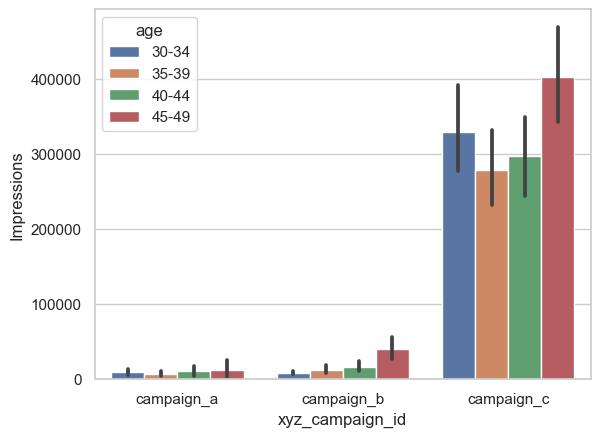

In [129]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=fb_df["xyz_campaign_id"], y=fb_df["Impressions"], hue=fb_df["age"], data=tips)

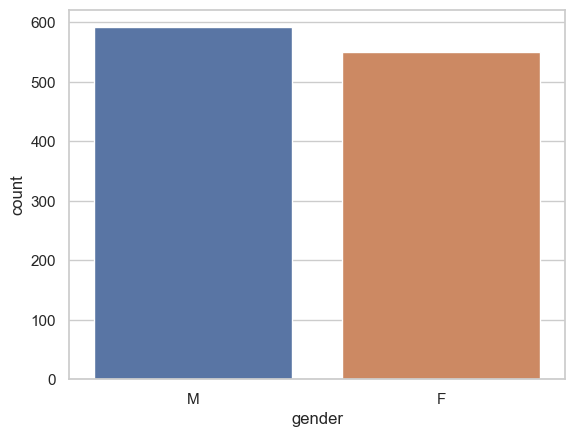

In [130]:
# count plot on single categorical variable 
sns.countplot(x ='gender', data = fb_df) 
# Show the plot 
plt.show() 

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

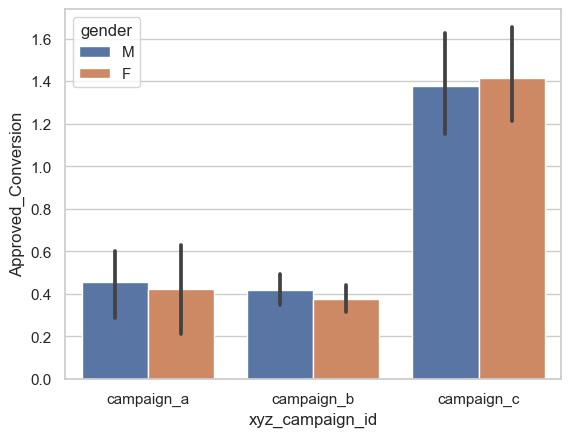

In [131]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=fb_df["xyz_campaign_id"], y=fb_df["Approved_Conversion"], hue=fb_df["gender"], data=tips)

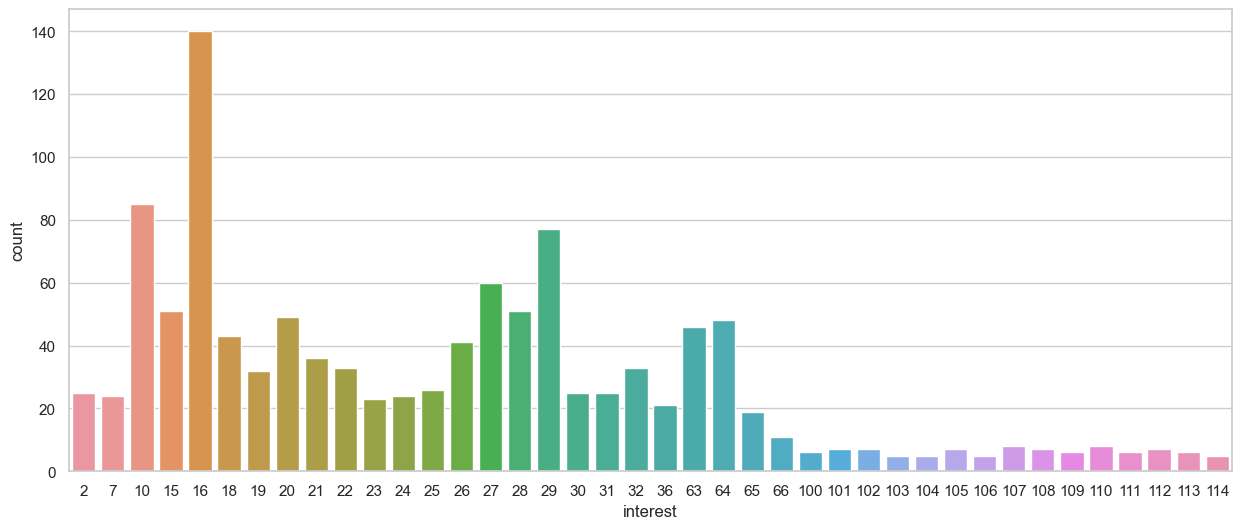

In [132]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = fb_df) 
# Show the plot 
plt.show() 

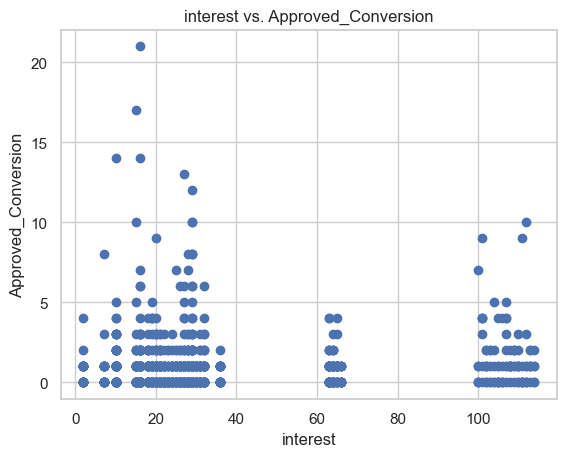

In [133]:
plt.scatter(fb_df["interest"], fb_df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

Text(0.5, 1.0, 'CPM Distribution by Campaign')

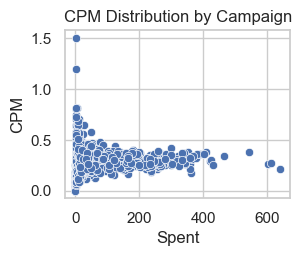

In [134]:
sns.set(style="whitegrid")
plt.subplot(2, 2, 1)
sns.scatterplot(x='Spent', y='CPM', data=fb_df)
plt.title('CPM Distribution by Campaign')

Text(0.5, 1.0, 'CPM Distribution by Campaign')

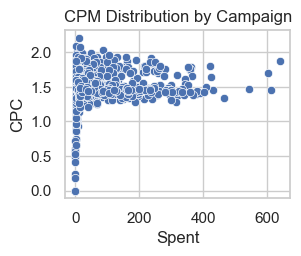

In [135]:
sns.set(style="whitegrid")
plt.subplot(2, 2, 1)
sns.scatterplot(x='Spent', y='CPC', data=fb_df)
plt.title('CPM Distribution by Campaign')

Text(0.5, 1.0, 'CPM Distribution by Campaign')

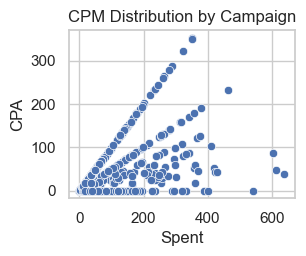

In [136]:
sns.set(style="whitegrid")
plt.subplot(2, 2, 1)
sns.scatterplot(x='Spent', y='CPA', data=fb_df)
plt.title('CPM Distribution by Campaign')

Text(0.5, 1.0, 'CPM Distribution by Campaign')

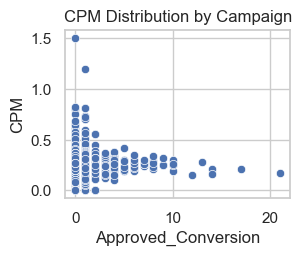

In [137]:
sns.set(style="whitegrid")
plt.subplot(2, 2, 1)
sns.scatterplot(x='Approved_Conversion', y='CPM', data=fb_df)
plt.title('CPM Distribution by Campaign')

Text(0.5, 1.0, 'CPM Distribution by Campaign')

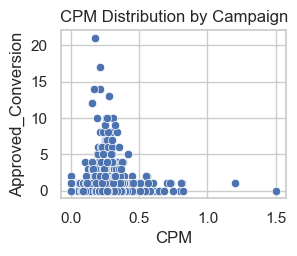

In [138]:
sns.set(style="whitegrid")
plt.subplot(2, 2, 1)
sns.scatterplot(x='CPM', y='Approved_Conversion', data=fb_df)
plt.title('CPM Distribution by Campaign')

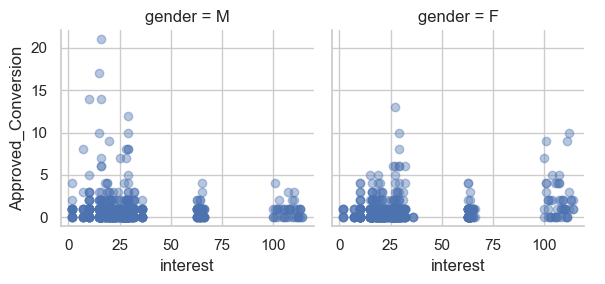

In [139]:
g = sns.FacetGrid(fb_df, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

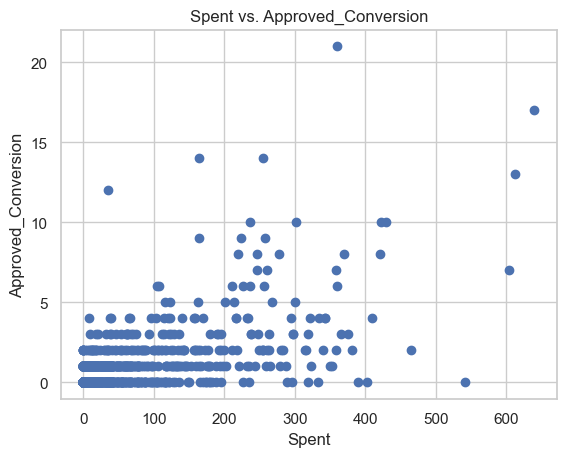

In [140]:
plt.scatter(fb_df["Spent"], fb_df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

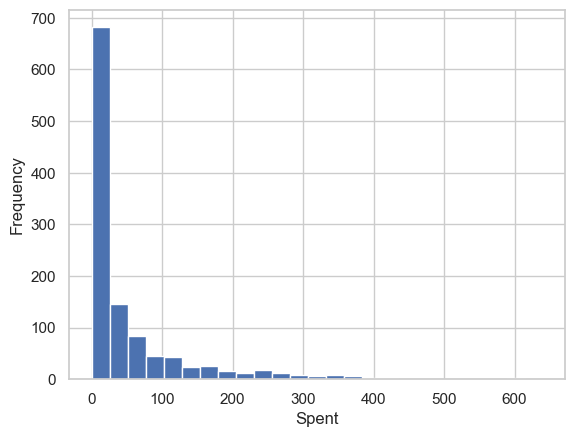

In [141]:
plt.hist(fb_df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

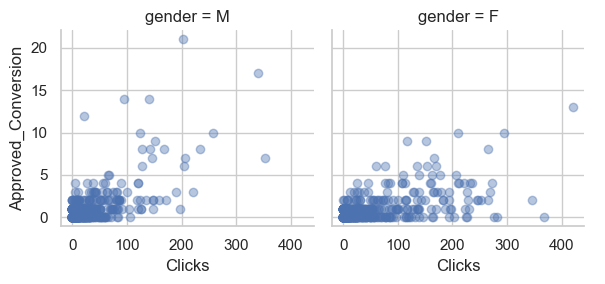

In [142]:
g = sns.FacetGrid(fb_df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

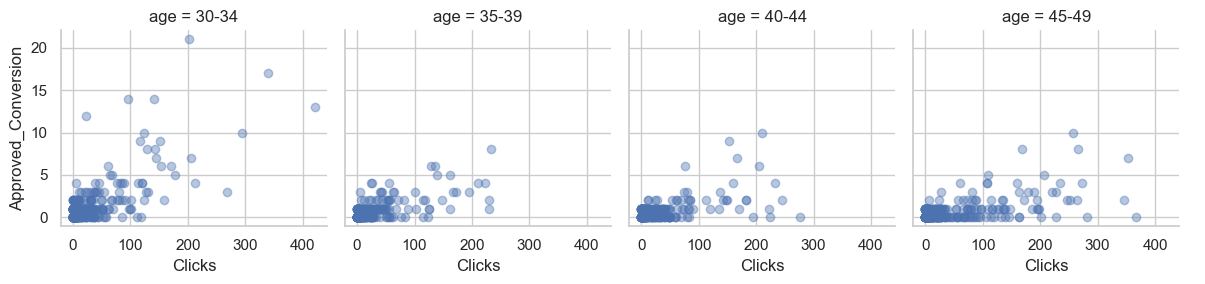

In [143]:
g = sns.FacetGrid(fb_df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

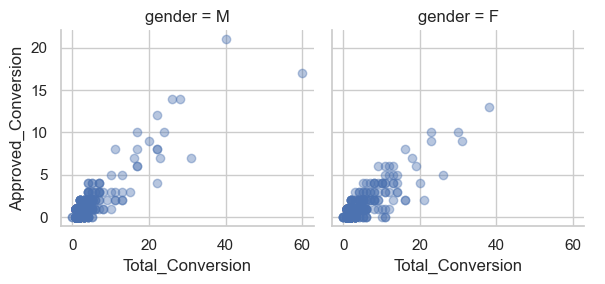

In [144]:
g = sns.FacetGrid(fb_df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

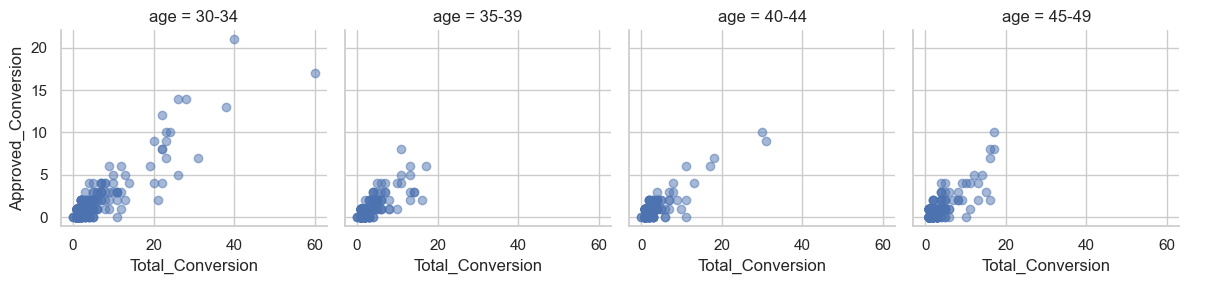

In [145]:
g = sns.FacetGrid(fb_df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

In [146]:
a=[]
b=[]
c=[]
for i,j,k in zip(fb_df.xyz_campaign_id, fb_df.fb_campaign_id, fb_df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)

In [147]:
zoomed={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(zoomed)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


In [148]:
#making a copy of the dataframe for the modelling
model_df = fb_df.copy()

In [149]:
model_df["xyz_campaign_id"].replace({"campaign_a":916 ,"campaign_b":936 ,"campaign_c":1178}, inplace=True)


In [150]:
#encoding gender
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(model_df["gender"])
model_df["gender"]=encoder.transform(model_df["gender"])
print(model_df["gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: gender, Length: 1143, dtype: int64


In [151]:
#encoding age
encoder.fit(model_df["age"])
model_df["age"]=encoder.transform(model_df["age"])
print(model_df["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [158]:
model_df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CTR,CPC,CPA,pareto_interest,conv1,conv2
0,708746,916,103916,0,1,15,7350,1,1.430000,2,1,0.194558,0.013605,1.430000,1.430000,15,1,1
1,708749,916,103917,0,1,16,17861,2,1.820000,2,0,0.101898,0.011198,0.910000,0.000000,16,1,0
2,708771,916,103920,0,1,20,693,0,0.000000,1,0,0.000000,0.000000,0.000000,0.000000,20,1,0
3,708815,916,103928,0,1,28,4259,1,1.250000,1,0,0.293496,0.023480,1.250000,0.000000,28,1,0
4,708818,916,103928,0,1,28,4133,1,1.290000,1,1,0.312122,0.024195,1.290000,1.290000,28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,3,0,109,1129773,252,358.189997,13,2,0.317046,0.022305,1.421389,179.094999,other,1,1
1139,1314411,1178,179978,3,0,110,637549,120,173.880003,3,0,0.272732,0.018822,1.449000,0.000000,other,1,0
1140,1314412,1178,179979,3,0,111,151531,28,40.289999,2,0,0.265886,0.018478,1.438929,0.000000,other,1,0
1141,1314414,1178,179981,3,0,113,790253,135,198.710001,8,2,0.251451,0.017083,1.471926,99.355000,other,1,1


In [159]:
x=np.array(model_df.drop(labels=["Approved_Conversion","Total_Conversion","CPM","CTR","CPC","CPA", 'pareto_interest'], axis=1))
y=np.array(model_df["Total_Conversion"])

In [160]:
x

array([[7.08746000e+05, 9.16000000e+02, 1.03916000e+05, ...,
        1.42999995e+00, 1.00000000e+00, 1.00000000e+00],
       [7.08749000e+05, 9.16000000e+02, 1.03917000e+05, ...,
        1.82000002e+00, 1.00000000e+00, 0.00000000e+00],
       [7.08771000e+05, 9.16000000e+02, 1.03920000e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.31441200e+06, 1.17800000e+03, 1.79979000e+05, ...,
        4.02899995e+01, 1.00000000e+00, 0.00000000e+00],
       [1.31441400e+06, 1.17800000e+03, 1.79981000e+05, ...,
        1.98710001e+02, 1.00000000e+00, 1.00000000e+00],
       [1.31441500e+06, 1.17800000e+03, 1.79982000e+05, ...,
        1.65609999e+02, 1.00000000e+00, 1.00000000e+00]])

In [161]:
y

array([2, 2, 1, ..., 2, 8, 5])

In [162]:
y=y.reshape(len(y),1)
y

array([[2],
       [2],
       [1],
       ...,
       [2],
       [8],
       [5]])

In [163]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [165]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)

/var/folders/tx/866j9sp56bn2h9wg1z37d2pm0000gn/T/ipykernel_9845/3493522810.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [166]:
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

In [167]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)

In [168]:
mae

0.8951965065502183

In [169]:
mse

4.056768558951965

In [170]:
#R-squred value
r2_score

0.785016724435866

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

NameError: name 'predictions' is not defined

In [ ]:
# Handle missing values
#df = df.dropna()

# Encode categorical variables
#df = pd.get_dummies(df, columns=['placement'], drop_first=True)